## Observations and Insights

## Dependencies and starter code

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, how='outer',on ='Mouse ID',)
merged_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
merged_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

merged_data_stats = pd.DataFrame(merged_data.groupby("Drug Regimen").count())

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts
merged_data_stats = pd.DataFrame(merged_data.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, need to make 
    

merged_data_stats["Mean"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
merged_data_stats["Median"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
merged_data_stats["Standard Deviation"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
merged_data_stats["Variance"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
merged_data_stats["SEM"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns
merged_data_stats = merged_data_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
merged_data_stats = merged_data_stats.rename(columns = {"Mouse ID" : "Trials"})

merged_data_stats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

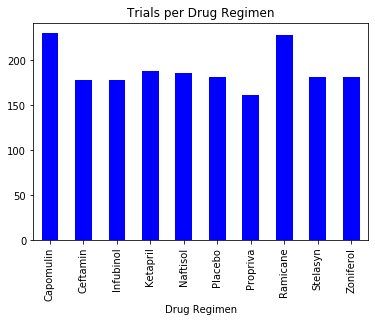

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [63]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Activities 5.1.7 and 5.1.8

datapoints = merged_data_stats[["Trials"]]

datapoints.plot(kind='bar', figsize=(6,4), color = 'b', legend=False)

plt.title('Trials per Drug Regimen')

plt.show()
plt.tight_layout

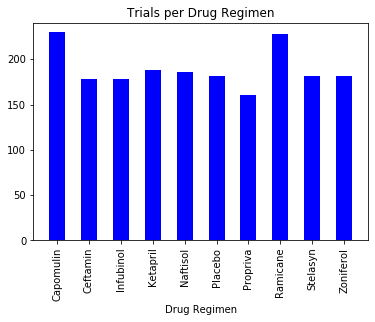

In [64]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Activities 5.1.7 and 5.1.8
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints['Trials'], color = 'b', width =.5)
plt.xticks(tick_locations, datapoints.index.values, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints['Trials'])+10)

plt.title('Trials per Drug Regimen')
plt.xlabel('Drug Regimen')

plt.show()

## Pie plots

In [74]:
merged_data_gender = merged_data[['Sex']]
merged_data_gender_df = merged_data_gender.groupby(['Sex'])
gendercount = merged_data_gender_df.nunique()
gendercount = gendercount[merged_data['Mouse ID']]

KeyError: "None of [Index(['k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403',\n       'k403',\n       ...\n       'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969',\n       'z969'],\n      dtype='object', length=1893)] are in the [columns]"

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Activities 5.1.9 and 5.1.10



gendercount = merged_data_gender_df.nunique()
gendercount = gendercount[merged_data['Mouse ID']]

labels = ['Female', 'Male']
color = ['Red', 'Blue']
explode = [0.05, 0]

plt.pie(gendercount, explode=explode, labels=labels, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=90, subplots=True, legend=False)

plt.title("Trials per Drug Regime")

plt.show()

KeyError: "None of [Index(['k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403',\n       'k403',\n       ...\n       'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969',\n       'z969'],\n      dtype='object', length=1893)] are in the [columns]"

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



NameError: name 'explode' is not defined

## Quartiles, outliers and boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#Activities 5

filtered_df = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin") | (merged_data["Drug Regimen"] == "Ramicane") | (merged_data["Drug Regimen"] == "Ceftamin") | (merged_data["Drug Regimen"] == "Propriva"), :]

filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


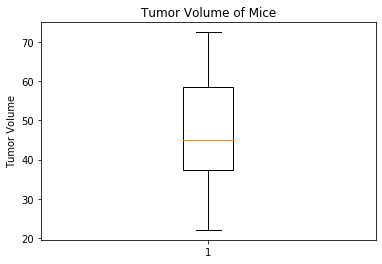

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and scatter plots

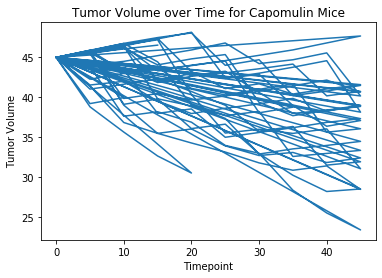

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

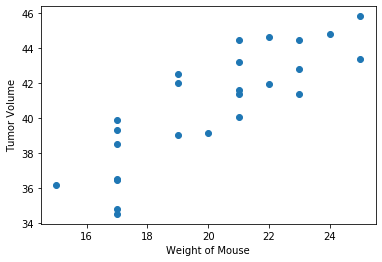

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Activities 5.3.6 & 5.3.7

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

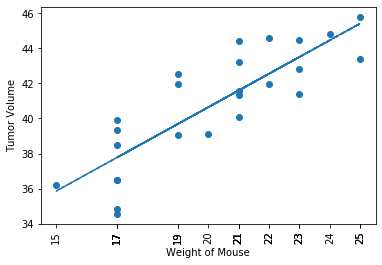

The correlation between weight and tumor value is 0.84


In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Activity 5.3.8 and 5.3.9

# Need values for x and y
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Linear regression 
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line 
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')
